<h1>Step 1: Load the datasets</h1>

In [1]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

# Display the first few rows of each dataset to understand their structure
train_data.head(), test_data.head(), gender_submission.head()

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

<h1>Step 2: Data Cleaning</h1>

<h2>2.1: Handle Missing Values</h2>

In [3]:
# Check for missing values in the training dataset
train_data.isnull().sum()

# Fill missing values in 'Age' with the median age
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the most frequent value
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to a large number of missing values
train_data.drop(columns=['Cabin'], inplace=True)

# Verify that all missing values have been handled
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<h1>Step 3: Exploratory Data Analysis (EDA)</h1>

<h2>3.1: Summary Statistics</h2>

In [4]:
# Display summary statistics for numerical columns
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h2>3.2: Distribution of Categorical Variables</h2>

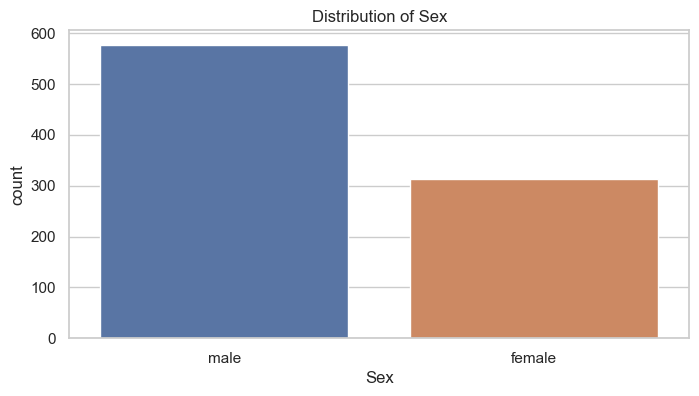

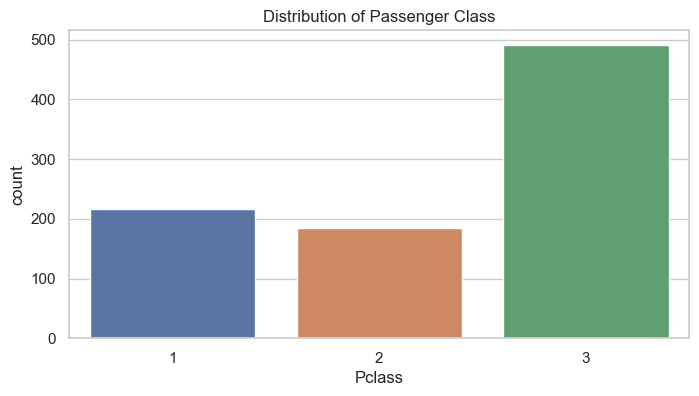

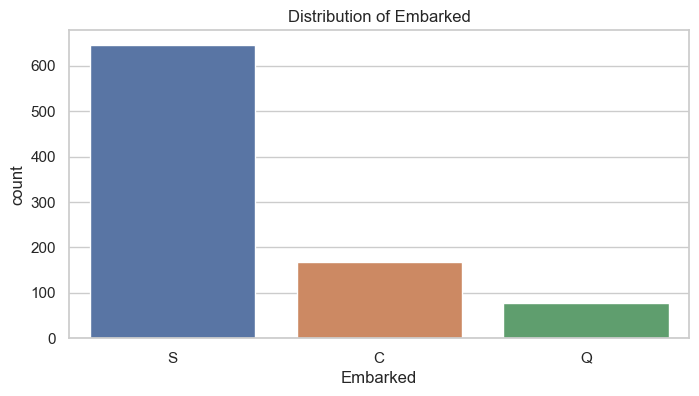

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plots
sns.set(style="whitegrid")

# Plot the distribution of 'Sex'
plt.figure(figsize=(8, 4))
sns.countplot(data=train_data, x='Sex')
plt.title('Distribution of Sex')
plt.show()

# Plot the distribution of 'Pclass'
plt.figure(figsize=(8, 4))
sns.countplot(data=train_data, x='Pclass')
plt.title('Distribution of Passenger Class')
plt.show()

# Plot the distribution of 'Embarked'
plt.figure(figsize=(8, 4))
sns.countplot(data=train_data, x='Embarked')
plt.title('Distribution of Embarked')
plt.show()

<h2>3.3: Relationships Between Variables</h2>

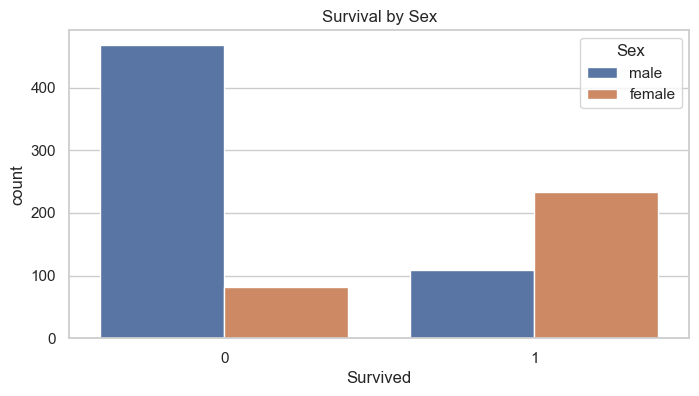

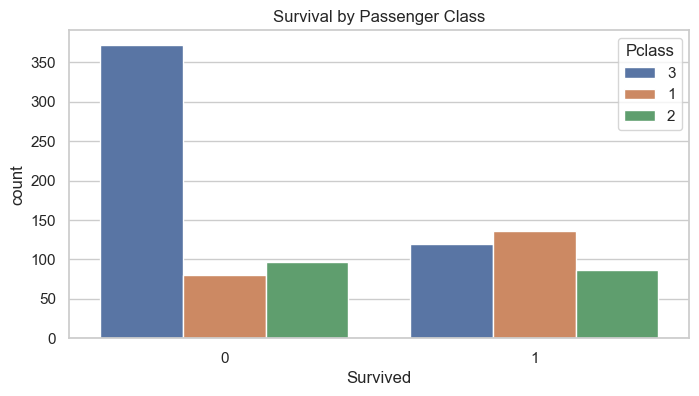

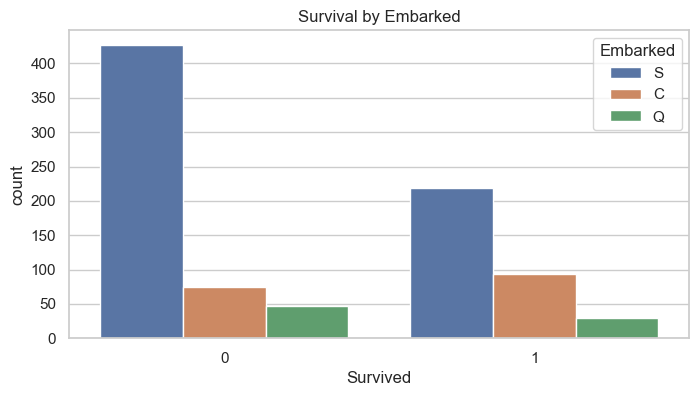

In [7]:
# Plot the relationship between 'Survived' and 'Sex'
plt.figure(figsize=(8, 4))
sns.countplot(data=train_data, x='Survived', hue='Sex')
plt.title('Survival by Sex')
plt.show()

train_data['Pclass'] = train_data['Pclass'].astype(str)
# Plot the relationship between 'Survived' and 'Pclass'
plt.figure(figsize=(8, 4))
sns.countplot(data=train_data, x='Survived', hue='Pclass')
plt.title('Survival by Passenger Class')
plt.show()

# Plot the relationship between 'Survived' and 'Embarked'
plt.figure(figsize=(8, 4))
sns.countplot(data=train_data, x='Survived', hue='Embarked')
plt.title('Survival by Embarked')
plt.show()

<h2>3.4: Distribution of Numerical Variables</h2>

C:\Users\Husain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


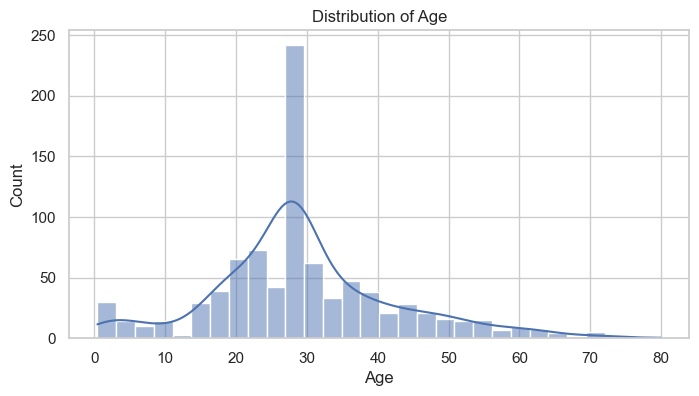

C:\Users\Husain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


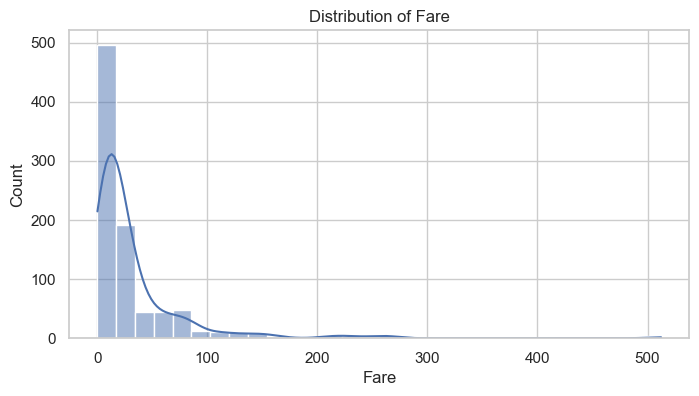

C:\Users\Husain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


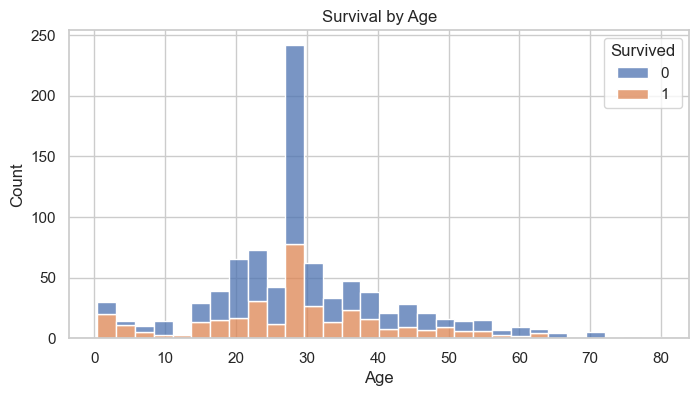

C:\Users\Husain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


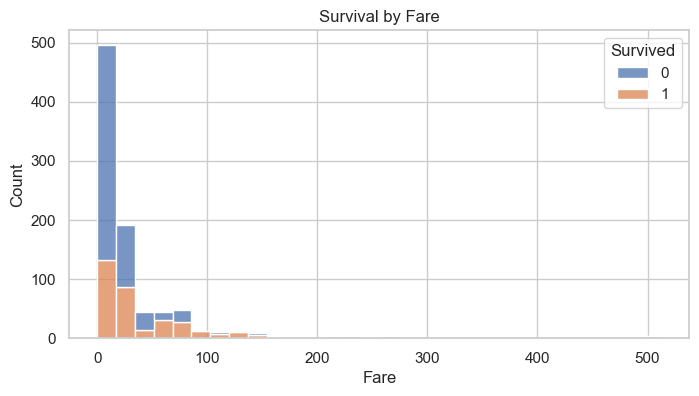

In [8]:
# Plot the distribution of 'Age'
plt.figure(figsize=(8, 4))
sns.histplot(train_data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

# Plot the distribution of 'Fare'
plt.figure(figsize=(8, 4))
sns.histplot(train_data['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.show()

# Plot the relationship between 'Survived' and 'Age'
plt.figure(figsize=(8, 4))
sns.histplot(data=train_data, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Survival by Age')
plt.show()

# Plot the relationship between 'Survived' and 'Fare'
plt.figure(figsize=(8, 4))
sns.histplot(data=train_data, x='Fare', hue='Survived', multiple='stack', bins=30)
plt.title('Survival by Fare')
plt.show()